# Imports and Setup
installing and importing necessary libaries & functions, setting hardware, random seed & folder path

In [ ]:
pip install torch torchvision captum memory_profiler opencv-python transformers shap

In [2]:
import sys
import os

# Add the project root to sys.path if not already included
project_root = os.path.abspath(".")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# personal functions
from datasets.dataset_loader import transform_no_resize, transform_model_input
from datasets.data_loader import load_dataset
from models.model_loader import load_model
from utils.benchmark_utils import measure_memory, calculate_energy
from utils.saving_results import save_experiment_results
from utils.load_xai import load_xai_method

# necessary libraries
from torch.utils.data import DataLoader, RandomSampler
import importlib    
import torch
import random
import inspect
import numpy as np
import statistics
import matplotlib.pyplot as plt
import importlib.util

In [3]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Set a seed for reproducibility
seed = 24
torch.manual_seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
# Visualizations path
visualization_dir = "experiment_results/visualizations"
os.makedirs(visualization_dir, exist_ok=True)

# Experiment Configurations
change parameters here for your experiment settings. you are free to choose from existing: 
* datasets (or add image URLs)
* ML model architectures
* gpu/cpu
* XAI methods

or add your own by following documentation

In [5]:
gpu_name = "RTX-2080-Ti"  
#  available GPUs:        GTX-1050, RTX-2080-Ti, P100, K80, Tesla-T4, ...
#  available CPUs:        Intel-Core-i7-9700K, AMD-Ryzen-5-3600, Intel-Xeon-E5-2650-v3, default-CPU, ...

#  ! new GPU/CPU's and their TDP (Thermal Design Power) should be added in:  'utils/benchmark_utils.py'  
#  check your current GPU/CPU by running: 'utils/check_hardware.ipynb'

In [ ]:
# number of images to get average efficiency summary from
num_images = 100        # e.g. 100 images for time measurements
memory_num_images = 10  # e.g. 10 images for memory usage

In [6]:
# Define the scope of parameter variations - multiple selections possible
DATA_TYPES = ['ImageNet', 'STL10']
MODEL_NAMES = ['resnet50', 'densenet121']
XAI_METHODS = ['CAM', 'Grad_CAM', 'Grad_CAM_plus_plus', 'LIME']

#---------------------------------------------------------------------------
#  available datasets:    CIFAR10, STL10, ImageNet, URL
#  available ML models:   resnet50, convnext-t, efficientnet-b0, swin-t, regnet-y-8gf, mobilenet-v3-large, densenet121
#  available GPUs:        GTX-1050, RTX-2080-Ti, P100, K80, Tesla-T4
#  available CPUs:        Intel-Core-i7-9700K, AMD-Ryzen-5-3600, Intel-Xeon-E5-2650-v3, default-CPU
#  Gradient-based XAI:    CAM, Grad_CAM, Grad_CAM_plus_plus, GradientShap, GuidedBackprop, DeepLiftShap, InputXGradient, Saliency, IntegratedGradients
#  Perturbation-based:    LIME, PermutationImportance, AblationStudies, RISE, Morris_Sensitivity_Analysis

# Benchmark Engine

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, CAM

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded CAM from Others

Average time taken for CAM on URL using resnet50: 0.0391 seconds

Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/CAM_resnet50_URL_RTX-2080-Ti_img1.png


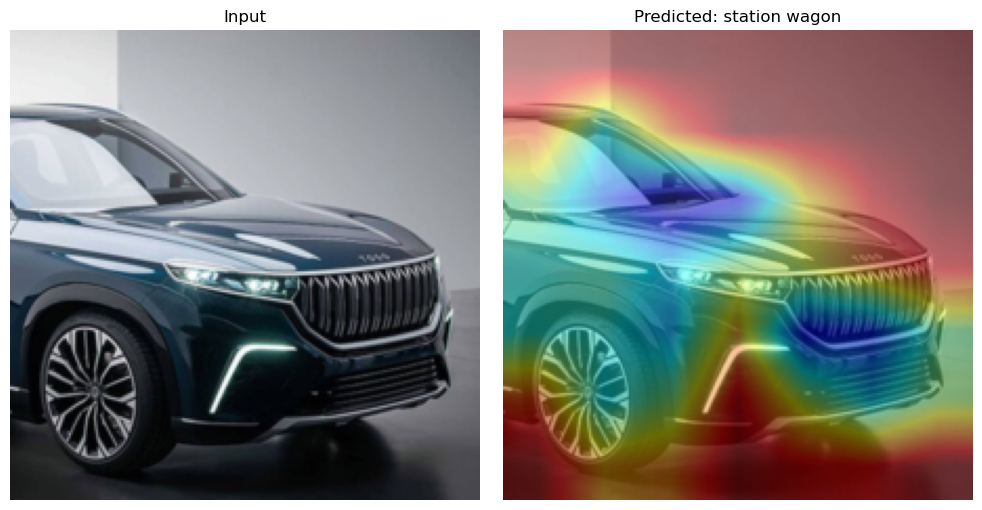

Error for Data: URL, Model: resnet50, Method: CAM: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, Grad_CAM

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded Grad_CAM from Local_Backpropagation

Average time taken for Grad_CAM on URL using resnet50: 0.0288 seconds

Model: resnet50, Predicted Class: station wago

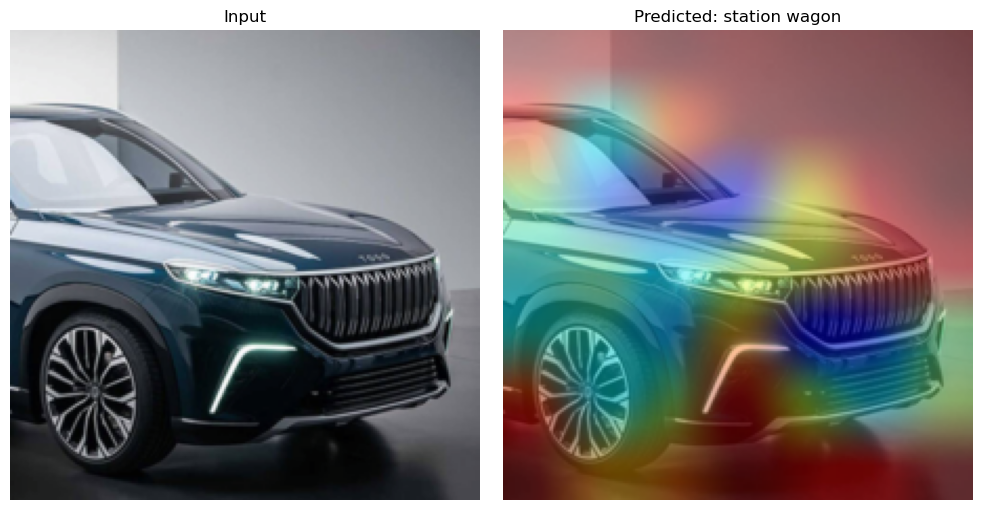

Error for Data: URL, Model: resnet50, Method: Grad_CAM: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, Grad_CAM_plus_plus

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded Grad_CAM_plus_plus from Local_Backpropagation


/opt/conda/lib/python3.11/site-packages/torch/nn/modules/module.py:1352: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "



Average time taken for Grad_CAM_plus_plus on URL using resnet50: 0.0491 seconds

Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/Grad_CAM_plus_plus_resnet50_URL_RTX-2080-Ti_img1.png


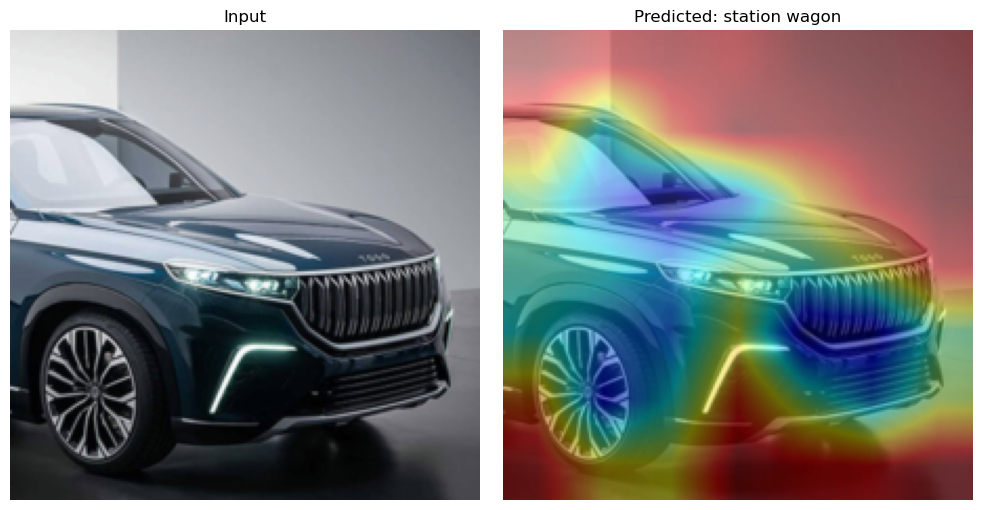

Error for Data: URL, Model: resnet50, Method: Grad_CAM_plus_plus: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, GradientShap

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded GradientShap from Local_Backpropagation

Average time taken for GradientShap on URL using resnet50: 0.0431 seconds

Model: resnet50, Pr

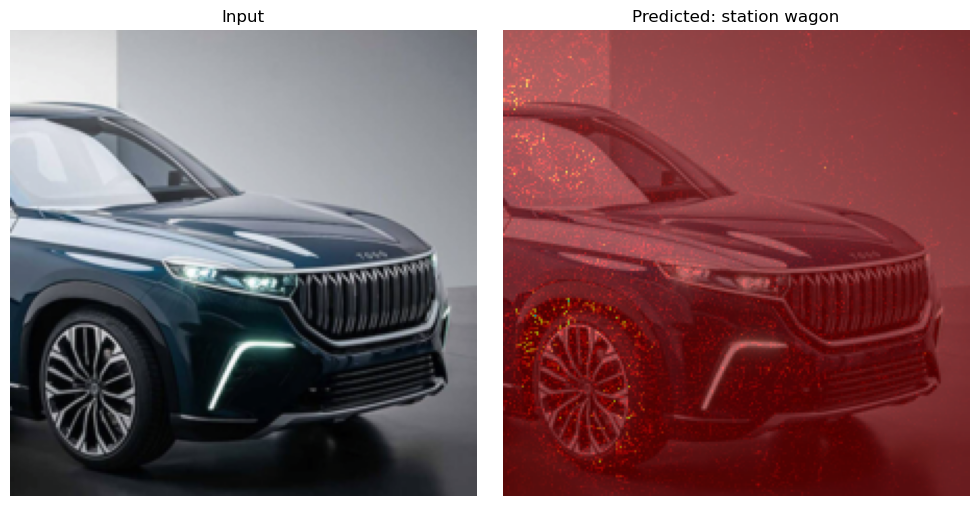

Error for Data: URL, Model: resnet50, Method: GradientShap: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, GuidedBackprop

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded GuidedBackprop from Local_Backpropagation

Average time taken for GuidedBackprop on URL using resnet50: 0.0444 seconds



/opt/conda/lib/python3.11/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:66: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:63: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)


Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/GuidedBackprop_resnet50_URL_RTX-2080-Ti_img1.png


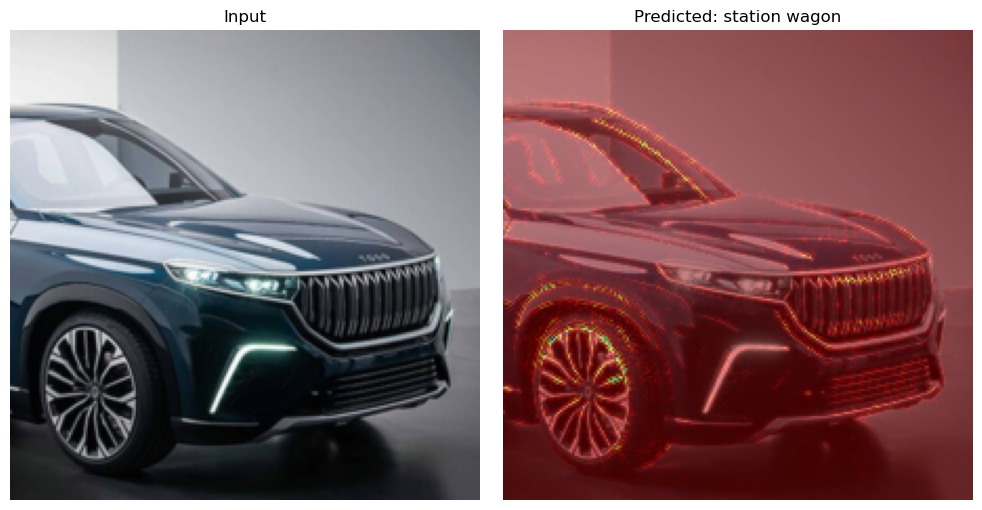

Error for Data: URL, Model: resnet50, Method: GuidedBackprop: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, DeepLiftShap

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded DeepLiftShap from Local_Backpropagation


/opt/conda/lib/python3.11/site-packages/captum/attr/_core/deep_lift.py:810: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  attributions = super().attribute.__wrapped__(  # type: ignore



Average time taken for DeepLiftShap on URL using resnet50: 0.0528 seconds

Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/DeepLiftShap_resnet50_URL_RTX-2080-Ti_img1.png


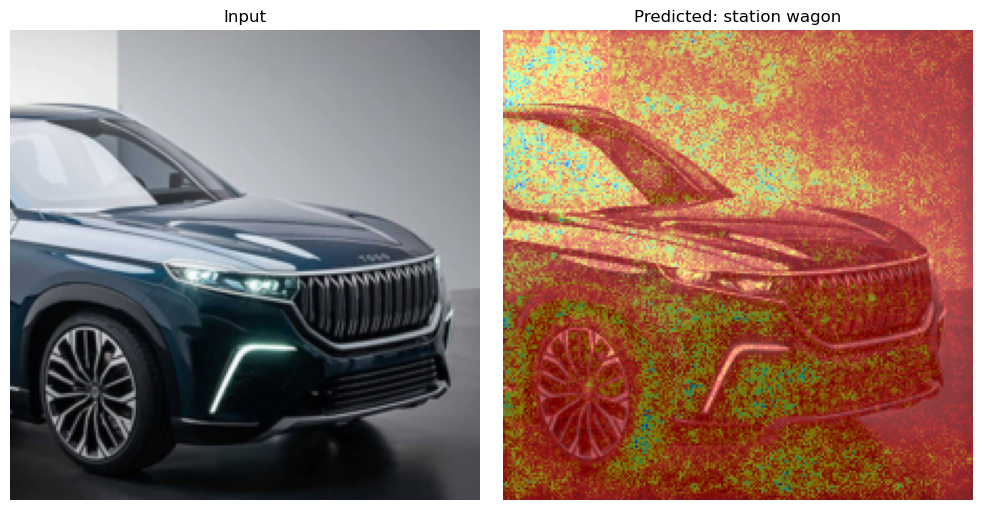

Error for Data: URL, Model: resnet50, Method: DeepLiftShap: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, InputXGradient

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded InputXGradient from Local_Backpropagation

Average time taken for InputXGradient on URL using resnet50: 0.0336 seconds



/opt/conda/lib/python3.11/site-packages/captum/attr/_core/input_x_gradient.py:118: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)


Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/InputXGradient_resnet50_URL_RTX-2080-Ti_img1.png


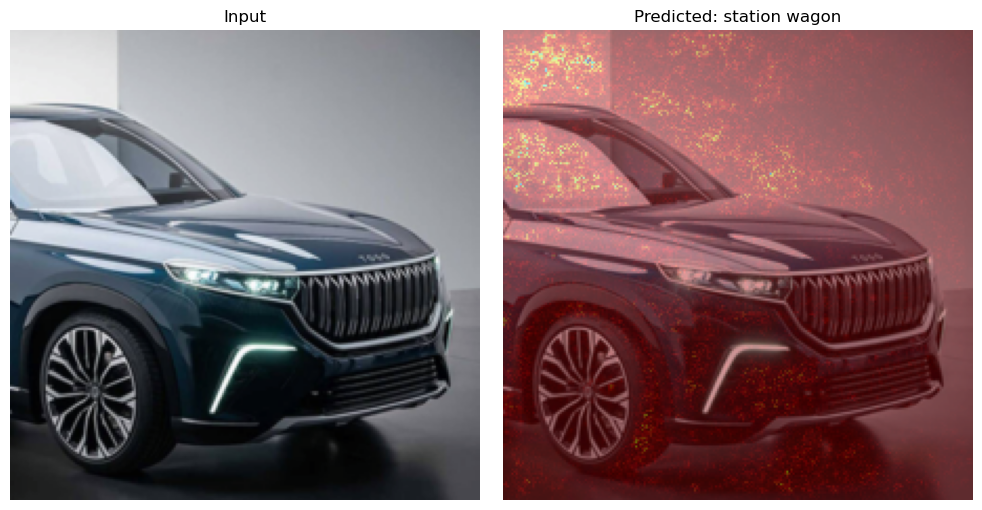

Error for Data: URL, Model: resnet50, Method: InputXGradient: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, Saliency

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded Saliency from Local_Backpropagation

Average time taken for Saliency on URL using resnet50: 0.0358 seconds



/opt/conda/lib/python3.11/site-packages/captum/attr/_core/saliency.py:129: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)


Model: resnet50, Predicted Class: station wagon, True Class: Unknown
Saved visualization at experiment_results/visualizations/Saliency_resnet50_URL_RTX-2080-Ti_img1.png


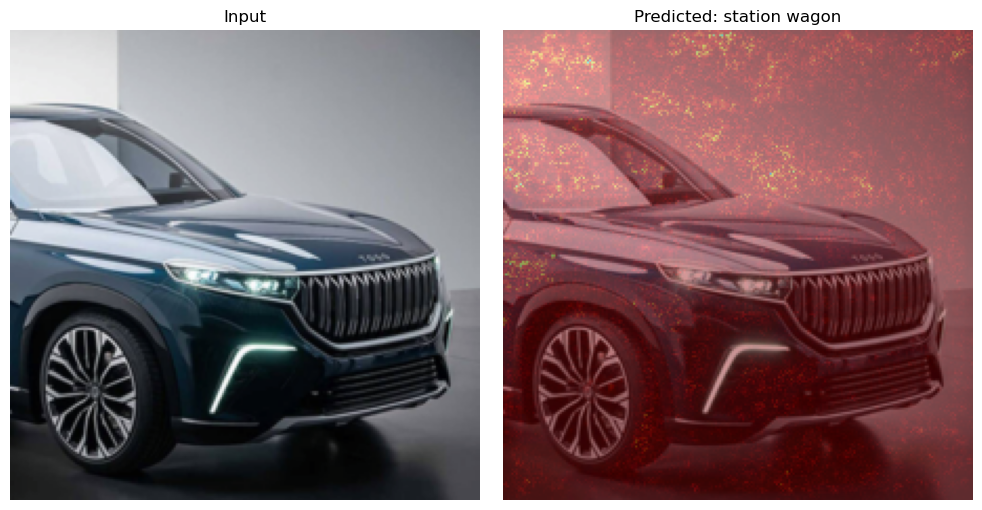

Error for Data: URL, Model: resnet50, Method: Saliency: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, IntegratedGradients

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded IntegratedGradients from Local_Backpropagation

Average time taken for IntegratedGradients on URL using resnet50: 0.7876 seconds

Model: r

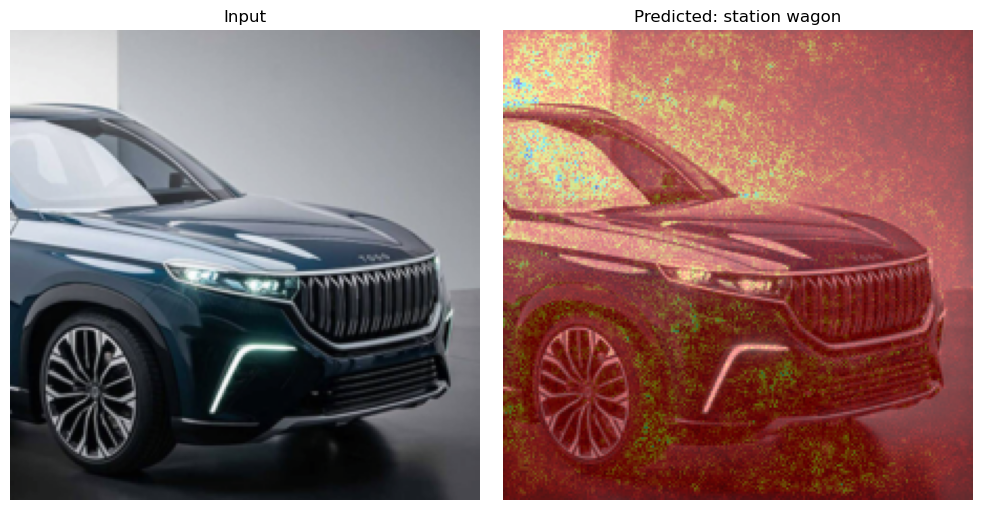

Error for Data: URL, Model: resnet50, Method: IntegratedGradients: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, LIME

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded LIME from Local_Perturbation

Average time taken for LIME on URL using resnet50: 1.8196 seconds

Model: resnet50, Predicted Class: station wag

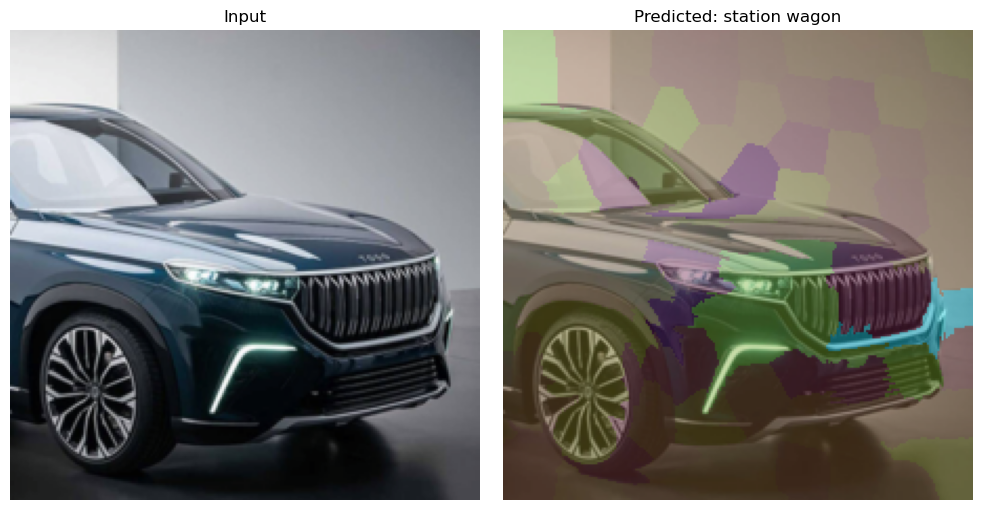

Error for Data: URL, Model: resnet50, Method: LIME: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, PermutationImportance

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded PermutationImportance from Local_Perturbation

Average time taken for PermutationImportance on URL using resnet50: 3.3224 seconds

Model: re

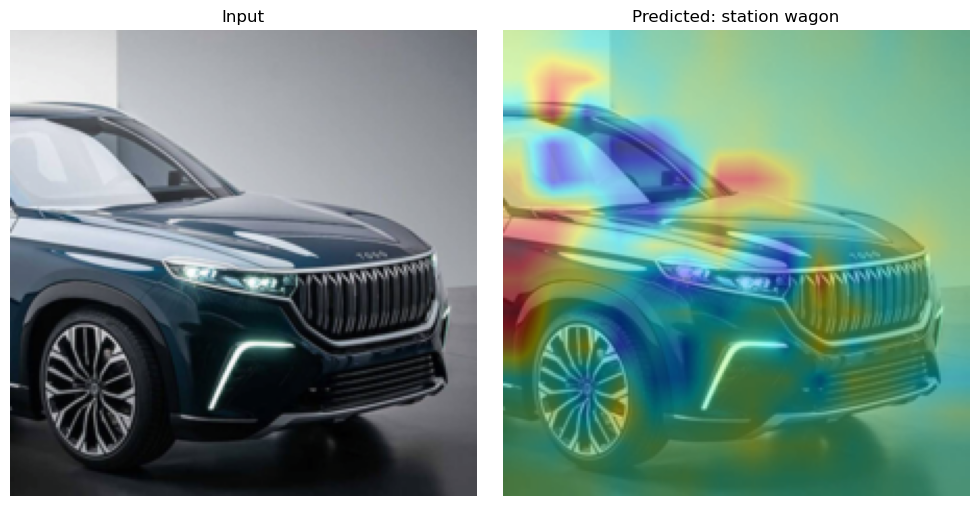

Error for Data: URL, Model: resnet50, Method: PermutationImportance: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, AblationStudies

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded AblationStudies from Local_Perturbation

Average time taken for AblationStudies on URL using resnet50: 3.3841 seconds

Model: res

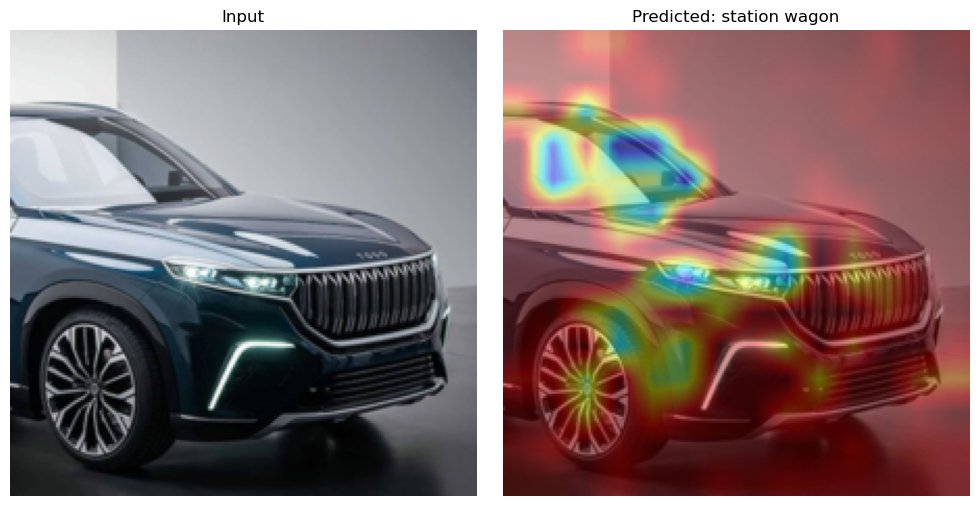

Error for Data: URL, Model: resnet50, Method: AblationStudies: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, RISE

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded RISE from Local_Perturbation

Average time taken for RISE on URL using resnet50: 75.6616 seconds

Model: resnet50, Predicted Class: station wagon,

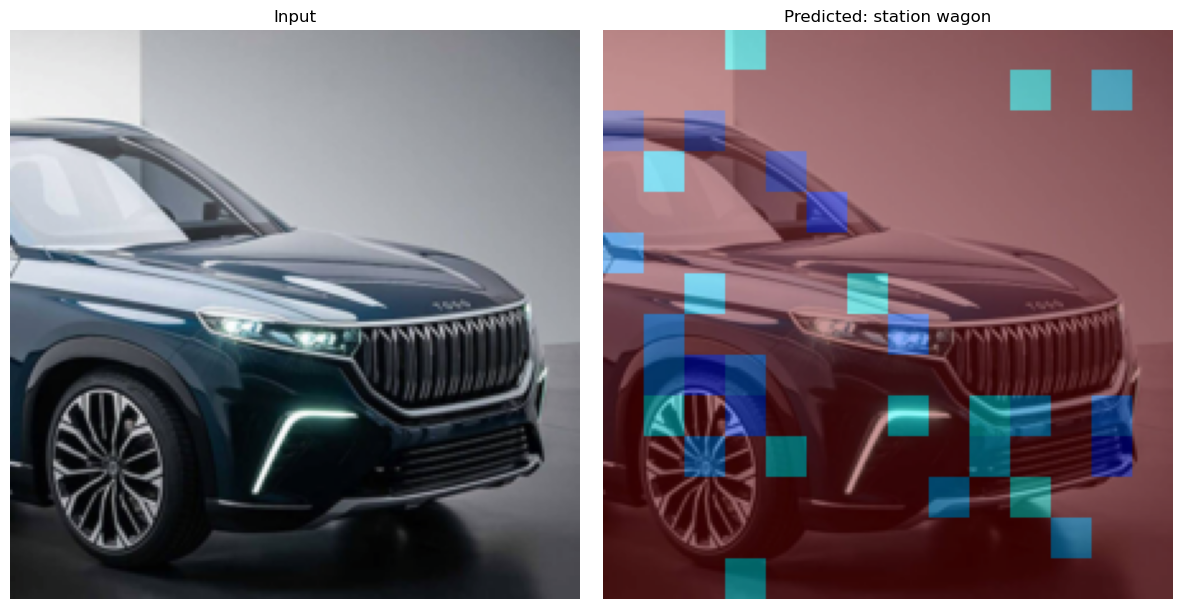

Error for Data: URL, Model: resnet50, Method: RISE: stdev requires at least two data points
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

Running benchmark for: URL, resnet50, Morris_Sensitivity_Analysis

Loading URL data...
Attempting to load image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Successfully loaded image from: https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg
Loaded 1 images from URLs.
Successfully loaded Morris_Sensitivity_Analysis from Local_Perturbation

Average time taken for Morris_Sensitivity_Analysis on URL using resnet50: 34.4795

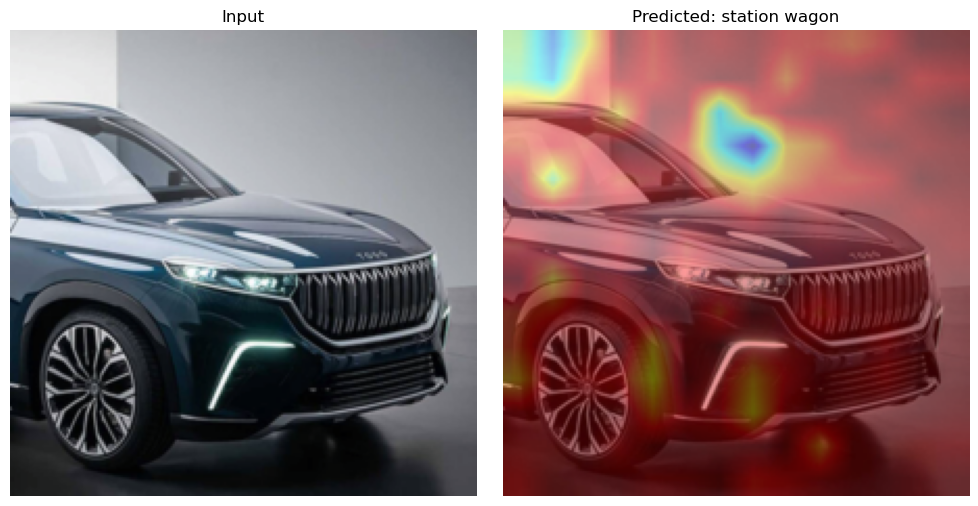

Error for Data: URL, Model: resnet50, Method: Morris_Sensitivity_Analysis: stdev requires at least two data points


In [7]:
# Loop through all combinations
for data_type in DATA_TYPES:
    
    # ------------   !!!   -   fill the URL links if data_type = 'URL'   -   !!!   ---------------- 
    image_urls = [
        "https://static.carringo.com/beses/blog/turkiyenin-ilk-yerli-otomobili-togg-de.jpg",
    ] if data_type == 'URL' else None
    # ---------------------------------------------------------------------------------------------
    
    for model_name in MODEL_NAMES:
        for xai_method in XAI_METHODS:
            print(f"------------------------------------------------------------------------------------------------------")
            print(f"------------------------------------------------------------------------------------------------------")
            print(f"------------------------------------------------------------------------------------------------------")
            print()
            print(f"Running benchmark for: {data_type}, {model_name}, {xai_method}")
            print()
            try:
                # Define the number of images to visualize
                if data_type == 'URL':
                    num_visualizations = num_images
                elif data_type == 'CIFAR10':
                    num_visualizations = 1
                else:
                    num_visualizations = 3

                # Load the model
                model = load_model(model_name=model_name, device=device)

                # Select the appropriate transform based on the method
                if xai_method in ['Grad-CAM', 'GlobalShap', 'GlobalDeepLift']:
                    transform = transform_model_input
                else:
                    transform = transform_no_resize  # Other methods do not require resizing

                # Load the dataset
                data_source, labels = load_dataset(
                    data_type=data_type,
                    num_images=num_images,
                    image_urls=image_urls,
                    selected_class=0,
                    transform=transform,
                    is_global_method=False
                )

                # Load the XAI method module dynamically
                method_module = load_xai_method(xai_method)

                # Retrieve functions from the module
                generate_attribution = method_module.generate_attribution
                measure_avg_time_across_images = method_module.measure_avg_time_across_images
                visualize_attribution = getattr(method_module, 'visualize_attribution', None)

                # Warm-up the method if supported
                if hasattr(method_module, 'warm_up'):
                    method_module.warm_up(model)

                # Process images and measure performance
                avg_time_taken, times = measure_avg_time_across_images(data_source, model, generate_attribution)
                
                print()
                print(f"Average time taken for {xai_method} on {data_type} using {model_name}: {avg_time_taken:.4f} seconds")
                print()


                # -------------------------------------------
                # (B) Measure memory only on a smaller subset
                # -------------------------------------------
                mem_subset_size = memory_num_images  # e.g. 10 images for memory usage
                mem_source = data_source[:mem_subset_size]


                # Memory usage and visualizations
                peak_memories = []
                net_memory_changes = []
                cached_visualizations = []

                for idx, data in enumerate(data_source):
                #for idx, data in enumerate(mem_source):
                    image, label = data if isinstance(data, (tuple, list)) else (data, None)
                    image = image.to(device)

                    with torch.no_grad():
                        output = model(image)
                        _, predicted_class = torch.max(output, 1)

                    # Measure memory
                    peak_memory, net_memory_change = measure_memory(image, predicted_class, generate_attribution, model)
                    peak_memories.append(peak_memory)
                    net_memory_changes.append(net_memory_change)

                    # Cache visualizations
                    if idx < num_visualizations:
                        attribution = generate_attribution(image, predicted_class, model)
                        cached_visualizations.append((image, attribution, label))

                    torch.cuda.empty_cache()

                # Visualize results
                for i, (image, attribution, label) in enumerate(cached_visualizations):
                    visualization_filename = f"{visualization_dir}/{xai_method}_{model_name}_{data_type}_{gpu_name}_img{i+1}.png"
                    visualize_attribution(image, attribution, label, labels, model, model_name, save_path=visualization_filename)

                # Calculate averages and standard deviations
                avg_peak_memory = sum(peak_memories) / len(peak_memories)
                avg_net_memory_change = sum(net_memory_changes) / len(net_memory_changes)
                std_time = statistics.stdev(times)
                std_peak_memory = statistics.stdev(peak_memories)
                std_net_memory_change = statistics.stdev(net_memory_changes)
                energy_consumed_kWh, used_gpu_name = calculate_energy(avg_time_taken, gpu_name, xai_method, model_name)

                print("----------------------------------------------------------------------------")
                print(f"Time: {avg_time_taken:.4f} seconds (±{std_time:.4f})")
                print(f"Peak Memory: {avg_peak_memory:.4f} MiB (±{std_peak_memory:.4f})")
                print(f"Net Memory Change: {avg_net_memory_change:.4f} MiB (±{std_net_memory_change:.4f})")
                print(f"Energy Consumed: {energy_consumed_kWh:.4f} kWh")
                print()

                # Save the results
                save_experiment_results(
                    xai_method, model_name, data_type,
                    {"energy_consumed_kWh": energy_consumed_kWh, "gpu_name": gpu_name, "num_images": num_images},
                    [{"image_index": i, "time": time, "peak_memory": peak, "net_memory_change": net}
                     for i, (time, peak, net) in enumerate(zip(times, peak_memories, net_memory_changes))],
                    {"time": avg_time_taken, "peak_memory": avg_peak_memory, "net_memory_change": avg_net_memory_change},
                    {"time": std_time, "peak_memory": std_peak_memory, "net_memory_change": std_net_memory_change}
                )

            except Exception as e:
                print(f"Error for Data: {data_type}, Model: {model_name}, Method: {xai_method}: {e}")